In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
titanic = pd.read_csv("train.csv")
display(titanic.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Label Encoding

Sex değişkenini Mean encoding yaparak encode ediniz. Her kategori için Survived değişkeninin ortalamasını kategori adı ile değiştirebilirsiniz. 

IPUCU: pandas groupby ve map fonksiyonlarını kullanabilirsiniz.

In [35]:
me = titanic.groupby("Sex")["Survived"].mean().to_dict()
titanic.Sex = titanic.Sex.map(me)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0.188908,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.742038,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0.742038,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.742038,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0.188908,35.0,0,0,373450,8.0500,NaN,S


Bindikleri Yer (Embarked) değişkenini sklearn OneHotEncoder objesini kullanarak encode edin.<br>

In [26]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
titanic.Embarked.fillna(titanic.Embarked.mode()[0], inplace=True)
ohe.fit_transform(titanic.Embarked.values.reshape(-1,1)).toarray()


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

Cabin değişkenini sklearn LabelEncoder veya OrdinalEncoder objesini kullanarak encode edin.

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic.Cabin.fillna(titanic.Cabin.mode()[0], inplace=True)
titanic["Cabin_le"] = le.fit_transform(titanic.Cabin)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_le
0,1,0,3,"Braund, Mr. Owen Harris",0.188908,22.0,1,0,A/5 21171,7.2500,B96 B98,S,47
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.742038,38.0,1,0,PC 17599,71.2833,C85,C,81
2,3,1,3,"Heikkinen, Miss. Laina",0.742038,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,47
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.742038,35.0,1,0,113803,53.1000,C123,S,55
4,5,0,3,"Allen, Mr. William Henry",0.188908,35.0,0,0,373450,8.0500,B96 B98,S,47


# Outlier Handling

Fare değişkeni için boxplot çizdiriniz.

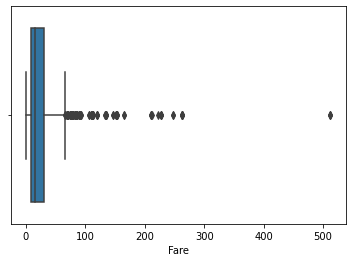

In [40]:
sns.boxplot(x=titanic.Fare)
plt.show()

Fare değişkeninedeki outlier değerleri Z-Score kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız. 

In [46]:
from scipy.stats import zscore
z_score_fare = zscore(titanic.Fare)
(z_score_fare > 3).sum(), (z_score_fare < -3).sum()

(20, 0)

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [55]:
upper_value = titanic["Fare"][z_score_fare<=3].max()
lower_value = titanic["Fare"][z_score_fare>=-3].min()
lower_value, upper_value

(0.0, 164.8667)

In [62]:
titanic_replaced = titanic.copy()
titanic_replaced.loc[z_score_fare>3, "Fare"] = upper_value
titanic_replaced.loc[z_score_fare<-3, "Fare"] = lower_value
titanic_replaced.Fare.max(), titanic_replaced.Fare.min(), titanic.Fare.max(), titanic.Fare.min() 

(164.8667, 0.0, 512.3292, 0.0)

Fare değişkeninedeki outlier değerleri IQR metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [69]:
q1 = titanic.Fare.quantile(0.25)
q3 = titanic.Fare.quantile(0.75)
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
lower, upper, len(titanic.Fare[(titanic.Fare < lower) | (titanic.Fare > upper)])

(-26.724, 65.6344, 116)

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [70]:
titanic_replaced2 = titanic.copy()
titanic_replaced2.loc[titanic.Fare>upper, "Fare"] = upper
titanic_replaced2.loc[titanic.Fare<lower, "Fare"] = lower
titanic_replaced2.Fare.max(), titanic_replaced2.Fare.min(), titanic.Fare.max(), titanic.Fare.min() 

(65.6344, 0.0, 512.3292, 0.0)

Fare değişkeninedeki outlier değerleri Hard-Edges metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [74]:
upper = titanic.Fare.quantile(q=0.99)
lower = titanic.Fare.quantile(q=0.01)
lower, upper, len(titanic.Fare[(titanic.Fare < lower) | (titanic.Fare > upper)])

(0.0, 249.00622000000033, 9)

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [75]:
titanic_replaced3 = titanic.copy()
titanic_replaced3.loc[titanic.Fare>upper, "Fare"] = upper
titanic_replaced3.loc[titanic.Fare<lower, "Fare"] = lower
titanic_replaced3.Fare.max(), titanic_replaced3.Fare.min(), titanic.Fare.max(), titanic.Fare.min() 

(249.00622000000033, 0.0, 512.3292, 0.0)

Fare değişkeni için yukarıdaki 3 metodu kullanarak sınır değerler olarak bulduğunuz değerleri ve outlier sayılarını karşılaştırın. Bu değişken için hangisini kullanmak daha mantıklı olabilir?

Hard edges metodunda az outlier buluyoruz ancak bu datadaki daha çok veriyi tutmamızı sağlıyor. Edgeleri biraz daha düşürüp bu metodu kullanmak daha mantıklı bana göre. 
